In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [15]:

def Projectile_Motion(y0, v0, theta, dt, g):
    x_array, y_array = [0], [y0]
    t_array = [0]
    vx, vy = v0*np.cos(theta), v0*np.sin(theta)
    while y_array[-1] > 0: # before it reaches the ground
        # take one step
        x_old, y_old = x_array[-1], y_array[-1]
        x_new = x_old + vx*dt
        y_new = y_old + vy*dt
        if y_new < 0:
            break
        x_array.append(x_new)
        y_array.append(y_new)
        # velocity update
        vy_old = vy
        vy = vy_old + g * dt
        
        t_array.append(t_array[-1]+dt)
    return x_array, y_array, t_array

In [24]:
y0 = 10 # 10 meters above ground
v0 = 10 # initial velocity 10 m/s
theta = np.pi/3 # angle of throwing
dt = 0.1 # timestep
g = -9.8
x1, y1, t1 = Projectile_Motion(y0, v0, theta, dt, g)
x2, y2, t2 = Projectile_Motion(y0, 20, np.pi/10, dt, g)

Text(0,0.5,'Y')

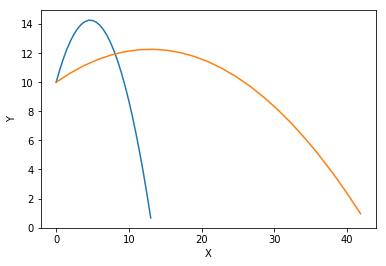

In [26]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel("X")
plt.ylabel("Y")

In [27]:
# we can introduce air resistance
def Projectile_Motion_AirResistance(y0, v0, theta, dt, g, m, D):
    # Drag coefficient D accounts for the drag coefficient C_D, air density, and area of the object
    x_array, y_array = [0], [y0]
    t_array = [0]
    vx, vy = v0*np.cos(theta), v0*np.sin(theta)
    ar_x, ar_y = -(D/m)*v0*vx, -(D/m)*v0*vy
    while y_array[-1] > 0: # before it reaches the ground
        # take one step
        x_old, y_old = x_array[-1], y_array[-1]
        x_new = x_old + vx*dt
        y_new = y_old + vy*dt
        if y_new < 0:
            break
        x_array.append(x_new)
        y_array.append(y_new)
        # velocity update
        vy_old = vy
        vy = vy_old + g * dt + ar_y * dt
        vx_old = vx
        vx = vx_old + ar_x * dt
        # air resistance update
        v = np.sqrt(vx**2 + vy** 2)
        ar_x, ar_y = -(D/m)*v*vx, -(D/m)*v*vy
        
        t_array.append(t_array[-1]+dt)
    return x_array, y_array, t_array

In [29]:
y0 = 10 # 10 meters above ground
v0 = 10 # initial velocity 10 m/s
theta = np.pi/3 # angle of throwing
dt = 0.1 # timestep
g = -9.8
m = 5
D = 0.8
x1, y1, t1 = Projectile_Motion(y0, v0, theta, dt, g)
x2, y2, t2 = Projectile_Motion_AirResistance(y0, v0, theta, dt, g, m, D)

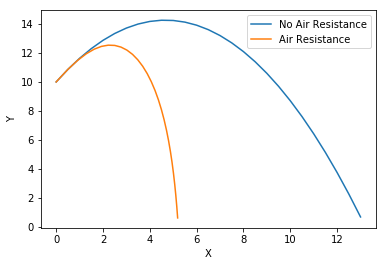

In [30]:
plt.plot(x1,y1, label="No Air Resistance")
plt.plot(x2,y2, label="Air Resistance")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()